<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
np.random.seed(seed=99)

In [60]:

Lambda = [
[0, 2/5, 1/5, 0, 0 ],
[0, 0, 3/4, 1/4, 0 ],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]
w = np.sum(Lambda, axis=1)
w_star = np.max(w)
Q = Lambda/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))


#Exercise 1

##a

In [61]:
#global clock--> wstar
def MySim(steps,start,finish):

  Q_cum = np.cumsum(Q, axis=1)
  time_last = np.zeros(steps, dtype=float)



  #I do 1000 steps and I exit only when I found my node
  for i in range(steps):
    #we start in position 1 
    pos = []
    pos.insert(0, start) 
    #array containing transition times from a state to another
    trans_times = []
    trans_times.insert(0,0)
    
    n=0
    t_next = -np.log(np.random.rand())/w_star

    while True:
        pos.append(np.argwhere(Q_cum[pos[n]] > np.random.rand())[0][0])
        trans_times.append(trans_times[n] + t_next)
        n += 1
        if pos[n] == finish:
          break

    #since transition times accumulates I only take last times    
    time_last[i] = trans_times[-1]
    #I take last time for each step

  #and I compute the average
  avg=np.average(time_last)
  return avg


In [62]:
avg_time=MySim(1000,1,1)
print("Average return time: {}".format(avg_time))

Average return time: 6.738973642535987


##b

In [63]:

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda


n_nodes = len(P)
S = [1]
R = [node for node in range(n_nodes) if node not in S]
hatP = P[np.ix_(R, R)]
hatw=w[np.ix_(R)]
hatx = np.linalg.solve((np.identity(len(R))-hatP),np.ones(len(R))/hatw)


hitting_s = np.zeros(n_nodes)
hitting_s[R] = hatx

ret_time=1/w[1]+np.dot(P[1,:],hitting_s)

print("Returning time:{}".format(ret_time))

Returning time:6.749999999999998


##c

In [64]:
avg_time=MySim(1000,0,4)
print("Hitting time: {}".format(avg_time))

Hitting time: 8.114122607905058


##d

In [65]:
n_nodes = len(P)

# Define the set S and the remaining nodes R
S = [4]
# same as R=np.setdiff1d(np.array(range(n)),S)
R = [node for node in range(n_nodes) if node not in S]

# Restrict P to R x R to obtain hat(P)
hatP = P[np.ix_(R, R)]
hatw = w[np.ix_(R)]
# solve the linear system to obtain hat(x)
# np.linalg.solve solves a linear matrix equation given
# the coefficient matrix and the dependent variable values
hatx = np.linalg.solve(np.identity(len(R))-hatP,np.ones(len(R))/hatw)
# define the hitting times to the set S
# hitting time is 0 if the starting node is in S
hitting_s = np.zeros(n_nodes)
# hitting time is hat(x) for nodes in R
hitting_s[R] = hatx

print("Theoretical hitting time: {}".format(hitting_s[[0]]))

Theoretical hitting time: [8.78571429]


#Exercise 2

##a. Particle perspective

###2a

In [66]:
result=np.zeros(100)

#you compute 1000 simulation for each of the 100 particles and then do the avg
for particle in range(100):
  
  result[particle]=MySim(1000,1,1)

print("Average time:{}".format(np.average(result)))


Average time:6.717380925247137


###2b

In [67]:
#rate=w_star
w_star=100
time_units=60 #steps
n_particles=100


def PathFinder(steps,start,rate):

  w_star=rate
  Q_cum = np.cumsum(Q, axis=1)
  time_last = np.zeros(steps, dtype=float)

   
  pos = []
  pos.insert(0, start) 

  trans_times = []
  trans_times.insert(0,0)
  t_next = -np.log(np.random.rand())/w_star
  n=0

  while trans_times[-1] < steps:
      #len(trans_times)
      pos.append(np.argwhere(Q_cum[pos[n]] > np.random.rand())[0][0])
      trans_times.append(trans_times[n] + t_next)
      n += 1
  
  return pos, len(trans_times)



#node_in_time = np.zeros(shape=(n_particles,---))
#occurr = np.zeros(shape=(n_nodes,time_units))


for part in range(n_particles):
  pos, trans_time_lenght=PathFinder(time_units,0,w_star)
  if part ==0:
    node_in_time = np.zeros(shape=(n_particles,trans_time_lenght))
    occurr = np.zeros(shape=(n_nodes,trans_time_lenght)) 

  node_in_time[part, :]=pos



for i in range(time_units):

  for val in node_in_time[: , i]:
    val=int(val)
    #print(val)
    occurr[val][i] += 1





#Average number of particles at the end of the simulation in different nodes

print("Average number of particles that touches each node at the end of the simulation:")
print("{}".format(np.average(occurr,axis=1)))






ValueError: ignored

In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = occurr[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()



#Exercise 3

In [69]:

Lambda_open = [
[0, 2/3, 1/3, 0, 0 ],
[0, 0, 1/4, 1/4, 2/4 ],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]]

w = np.sum(Lambda_open, axis=1)
w_star = np.max(w)
Q = Lambda_open/w_star
Q = Q + np.diag( np.ones(len(w)) - np.sum(Q, axis=1) )



In [ ]:
def MySim(rate,time_units,ex):

 
  transition_times = []
  transition_times.append(0)
  t_next=transition_times[0]
  occurrencies = np.zeros(5)
  distr_nodes_time = np.array([[0, 0, 0, 0, 0]])
  
  Q_cum = np.cumsum(Q, axis=1)
  
  while t_next < time_units:
    
    temp = np.zeros(6)
    
    if ex=='a':
      num_part = rate
    if ex=='b':
      rate_tot = rate

    temp[5] = rate
    

    if ex=='a':
      num_part += np.sum(occurrencies)
      for i in range(5):
        temp[i] = occurrencies[i]
      particles_cum = np.cumsum(temp)/num_part
      t_next = transition_times[-1] - np.log(np.random.rand()) /num_part
    
    if ex=='b':
      for i in range(5):
        temp[i] = 1
        rate_tot += 1
      particles_cum = np.cumsum(temp)/rate_tot
      t_next = transition_times[-1] - np.log(np.random.rand()) /rate_tot


    
    start = np.argwhere(particles_cum > np.random.rand())[0][0]


 

    if start == 5:
      occurrencies[0] += 1
    
    elif occurrencies[start]==0 and ex=='b':
      pass
    
    else:
      if start == 4:
        occurrencies[4] -= 1
    
      else:
        end = np.argwhere(Q_cum[start] > np.random.rand())[0][0]
        occurrencies[start] -= 1
        occurrencies[end] += 1
    
    transition_times.append(t_next)
    distr_nodes_time = np.concatenate((distr_nodes_time, [occurrencies]), axis = 0)

  return transition_times,distr_nodes_time
 

##3a

In [ ]:
rate_enter=1
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(2,60, 'b')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, i], label=labels[i])

ax.legend()
plt.show()

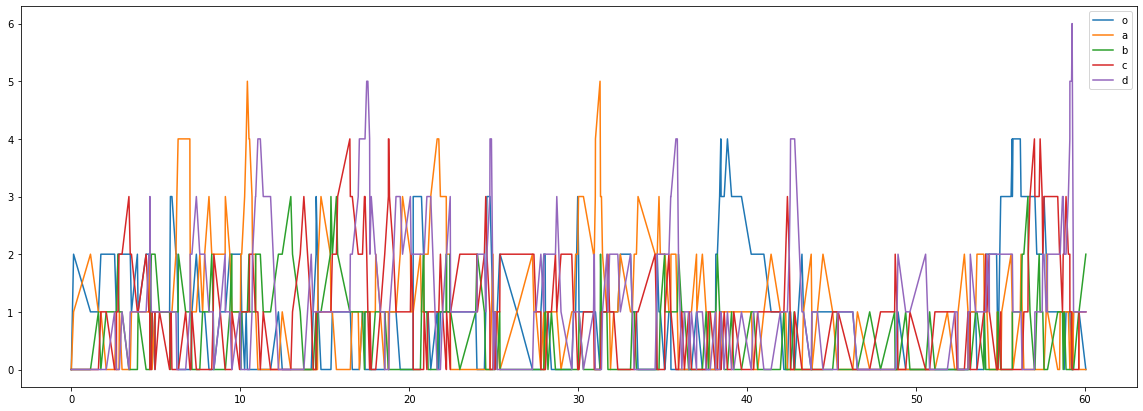

##3b